# COVID-19 cases in hospital and ICU by Ontario Health (OH) region

This dataset comes from [Ontario Data Catalogue](https://data.ontario.ca/en/dataset/covid-19-cases-in-hospital-and-icu-by-ontario-health-region) and it compiles daily snapshots of publicly reported data on 2019 Novel Coronavirus (COVID-19) testing in Ontario.

In [11]:
# Set up modules.
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [3]:
df_region_icu = pd.read_csv('region_hospital_icu_covid_data.csv')
df_region_icu['date'] = pd.to_datetime(df_region_icu['date'])

In [4]:
# region_icu_df.set_index('oh_region')
# df1.drop(df1.loc[df1['Date_Time'] == '2012-01-01 01:00:00'].index, inplace=True)
df_region_icu.drop(df_region_icu.loc[df_region_icu['date'] < '2020-05-01'].index, inplace=True)


In [5]:
df_region_icu.set_index('date', inplace=True)

In [6]:
df_region_icu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2020-05-01 to 2023-02-02
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   oh_region                 5035 non-null   object
 1   icu_current_covid         5035 non-null   int64 
 2   icu_current_covid_vented  5035 non-null   int64 
 3   hospitalizations          5035 non-null   int64 
 4   icu_crci_total            5035 non-null   int64 
 5   icu_crci_total_vented     5035 non-null   int64 
 6   icu_former_covid          5035 non-null   int64 
 7   icu_former_covid_vented   5035 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 354.0+ KB


In [9]:
pd.date_range(start = '2020-05-01', end = '2023-02-02' ).difference(df_region_icu[df_region_icu['oh_region']=='WEST'].index)

DatetimeIndex(['2020-07-04'], dtype='datetime64[ns]', freq=None)

In [54]:
df_region_icu

,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
date,,,,,,,,
2020-05-01,CENTRAL,79,59,411,86,64,7,5
2020-05-02,CENTRAL,79,55,415,83,64,4,9
2020-05-03,CENTRAL,87,65,396,91,67,4,2
2020-05-04,CENTRAL,85,66,396,89,69,4,3
2020-05-05,CENTRAL,86,67,433,90,72,4,5
...,...,...,...,...,...,...,...,...
2023-01-29,WEST,24,10,366,27,12,3,2
2023-01-30,WEST,23,10,380,26,12,3,2
2023-01-31,WEST,24,12,361,27,14,3,2


In [17]:
df_region_icu.groupby('oh_region').mean()

,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
oh_region,,,,,,,
CENTRAL,55.461768,35.454816,274.548163,62.294935,39.682224,6.833168,4.227408
EAST,40.773585,22.888779,188.096326,46.551142,25.796425,5.774578,2.907646
NORTH,8.365442,3.656405,57.807349,8.797418,3.856008,0.431976,0.199603
TORONTO,30.614697,20.852036,130.950348,37.800397,24.983118,7.185700,4.131082
WEST,54.553128,33.619662,267.476663,62.371400,37.561072,7.818272,3.941410


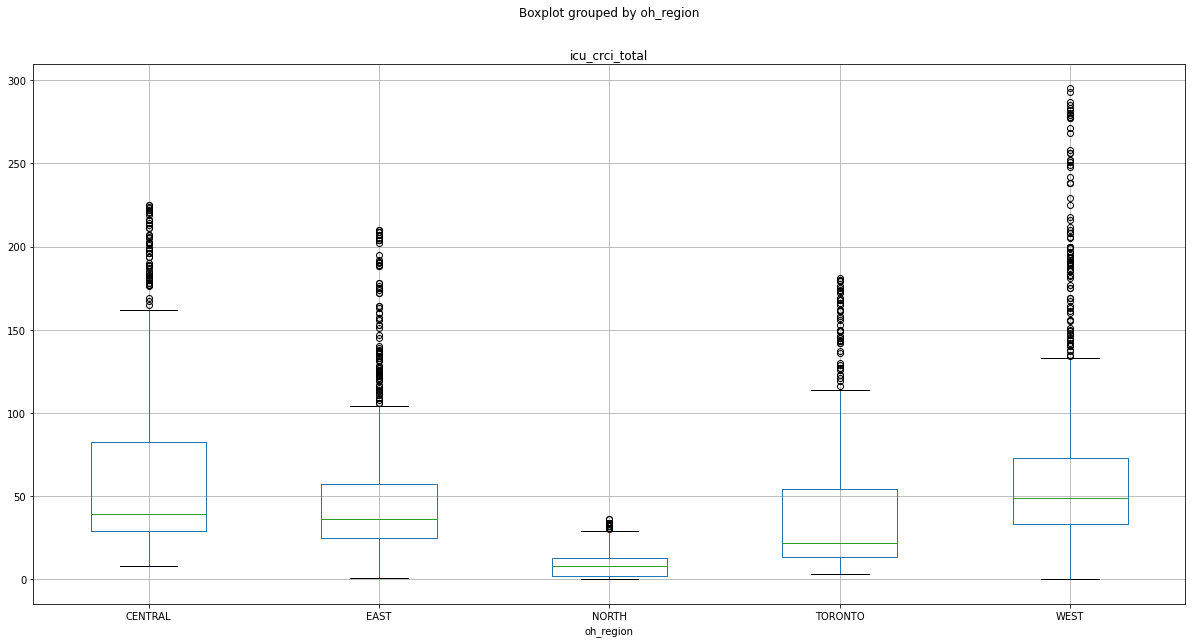

In [16]:
df_region_icu.boxplot('icu_crci_total', by='oh_region', figsize=(20, 10));

In [13]:
# group0 = df_region_icu[df_region_icu["oh_region"] == 'CENTRAL']["icu_crci_total"]
# group1 = df_region_icu[df_region_icu["oh_region"] == 'EAST']["icu_crci_total"]
# group2 = df_region_icu[df_region_icu["oh_region"] == 'NORTH']["icu_crci_total"]
# group3 = df_region_icu[df_region_icu["oh_region"] == 'TORONTO']["icu_crci_total"]
# group4 = df_region_icu[df_region_icu["oh_region"] == 'WEST']["icu_crci_total"]
# stats.f_oneway(group0, group1, group2, group3, group4)

In [20]:
region_pop = {'EAST': 3700000, 'WEST': 4000000, 'NORTH': 789999, 'TORONTO': 1400000, 'CENTRAL': 5000000}

In [51]:
df_region_icu['test'] = df_region_icu.groupby('oh_region')['icu_crci_total'].transform(lambda x:x*100/region_pop[x.name])
df_region_icu

,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented,test
date,,,,,,,,,
2020-05-01,CENTRAL,79,59,411,86,64,7,5,0.001720
2020-05-02,CENTRAL,79,55,415,83,64,4,9,0.001660
2020-05-03,CENTRAL,87,65,396,91,67,4,2,0.001820
2020-05-04,CENTRAL,85,66,396,89,69,4,3,0.001780
2020-05-05,CENTRAL,86,67,433,90,72,4,5,0.001800
...,...,...,...,...,...,...,...,...,...
2023-01-29,WEST,24,10,366,27,12,3,2,0.000675
2023-01-30,WEST,23,10,380,26,12,3,2,0.000650
2023-01-31,WEST,24,12,361,27,14,3,2,0.000675


oh_region
CENTRAL    AxesSubplot(0.125,0.2;0.775x0.68)
EAST       AxesSubplot(0.125,0.2;0.775x0.68)
NORTH      AxesSubplot(0.125,0.2;0.775x0.68)
TORONTO    AxesSubplot(0.125,0.2;0.775x0.68)
WEST       AxesSubplot(0.125,0.2;0.775x0.68)
Name: test, dtype: object

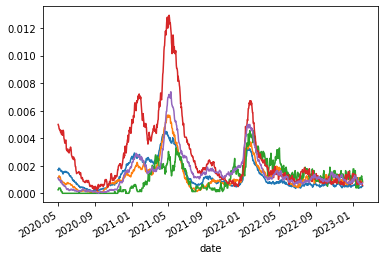

In [53]:
df_region_icu.groupby('oh_region')['test'].plot()